# Lecture 2: Introduction to Predictive Modeling

> Ignorance is preferable to error and he is less remote from the truth who believes nothing than he who believes what is wrong.
Thomas Jefferson (1781)

## Objectives
+ To define predictive modeling.
+ To introduce the idea of structural causal models and their graphical representation.
+ To tell the difference between aleatory and epistemic uncertainties.
+ To introduce the uncertainty propagation problem.
+ To introduce the model calibration problem.

## Readings

+ These notes.

+ [Oden, Moser, Ghattas, Computer Predictions with Quantified Uncertainty, Part I](https://archive.siam.org/pdf/news/1842.pdf)

+ [Oden, Moser, Ghattas, Computer Predictions with Quantified Uncertainty, Part II](https://archive.siam.org/pdf/news/1857.pdf)

In [1]:
# Import the things we need to plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')

## Predictive Modeling

> Reports that say that something hasn't happened are always interesting to me, because as we know, there are known knowns; there are things we know we know. We also know there are known unknowns; that is to say we know there are some things we do not know. But there are also unknown unknowns—the ones we don't know we don't know. And if one looks throughout the history of our country and other free countries, it is the latter category that tend to be the difficult ones. Donald Rumsfeld, United States Secretary of Defense, [DoD news briefing, February 12, 2002](https://archive.defense.gov/Transcripts/Transcript.aspx?TranscriptID=2636).

*Predictive modeling* is the process of describing our state of knowledge about known unknowns in order to make informed decisions.
This is the scope of this class.

Unfortunately, there is no automated way for turning unknown unknowns to known unknowns.
This is currently done manually as it requires common sense and human intuition.
Automating this process seems to require the ability to perform induction on open-ended problems and it may require general artificial intelligence.

## Structural causal models

A *causal model* is a model that attempts to capture the mechanisms that govern a given phenomenon.
We will use the language of *structural causal models* (SCM), developed by the computer scientist Judea Pearl, to formalize the concept.
A structural causal model is a collection of three things:
+ A set of variables. These are variables that our model is trying to explain (endogenous), but also other variables that may just be needed (exogenous).
+ A set of functions that give values to each variable based on the values of all other variables.

Most physical and engineering models are causal models.

### Example: Asthma model (J. Pearl)

Suppose that we are trying to study the causal relationships between a treatment $X$ and lung function $Y$ for individuals who suffer from asthma.
However, it is plausible that $Y$ also depends on the air pollution levels $Z$.
The final ingredient is the set of function that connects $X$ and $Z$ to $Y$.
$$
Y = f(X, Z).
$$

### Graphical representation of causal models
Every SCM is corresponds to a *graphical causal model*.
These are usually *directed acyclic graphs* (DAGs).
These can be read trivially from the SCM form.
Let's look at an example.

### Example: Asthma model - Graphical causal model
Here I am representing each variable with a node.
The node at the beginning on an arrow is the direct cause of the node at the end of the arrow.

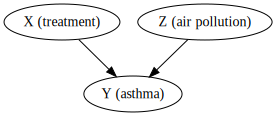

In [29]:
from graphviz import Digraph # TODO add pygraphviz to dependencies
g = Digraph('Asthma')
g.node('X', label='X (treatment)')
g.node('Y', label='Y (asthma)')
g.node('Z', label='Z (air pollution)')
g.edge('X','Y')
g.edge('Z', 'Y')
#g.render('asthma_graph', format='png') # Uncomment the line if you want to save the figure
g

## Types of Uncertainty
In general, we are uncertain about something if we don't know much about it.
In particular, we can be uncertain about:
+ the value of a model parameter;
+ the initial conditions of an ordinary differential equations;
+ the boundary conditions of a partial differential equation;
+ the value of an experimental measurment we are about to perform;
+ the mathematical form of a model;
+ etc.

Uncertainty may be *aleatory* or *epistemic*.

+ Aleatory uncertainty is associated with inherent system randomness. 
+ Epistemic uncertainty is associated with lack of knowledge.

There is a long philosophical debate about this distinction.
We are going to ignore it.
The instructors view is that common sense and **probability theory are sufficient to describe both uncertainties**.

### Example: Driving a trailer on a rough road (1/3)

The following example is modified from Purdue's Basic Mechanics II Lecture Book.
In the figure you see a trailer of mass $m$ moving on a rough road with speed $v$.
The suspension spring constant is $k$.
We are intersted in the vibration amplitude $X$.

![Trailer](trailer.png)

We do not know (yet) how we can model a true road, so let us assume that the road surface is sinusoidal with amplitude $y_0$ and "wavelength" $L$.
Doing a [little bit dynamics](https://www.youtube.com/watch?v=d4OKBqr_aYQ&feature=youtu.be), shows that the amplitude of the suspension oscilation is:
$$
X = \left|\frac{ky_0}{k-m\omega^2}\right|,
$$
where the angular velocity is:
$$
\omega = \frac{2\pi v}{L}.
$$
Let's draw the causal graph:

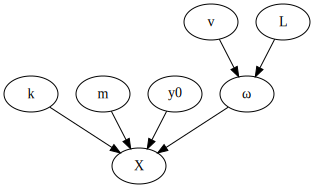

In [30]:
g = Digraph('Trailer')
g.node('k')
g.node('m')
g.node('y0', label='<y<sub>0</sub>>')
g.node('omega', label='<&omega;>')
g.node('v')
g.node('L')
g.node('X')
g.edge('v', 'omega')
g.edge('L', 'omega')
g.edge('y0', 'X')
g.edge('omega', 'X')
g.edge('k', 'X')
g.edge('m', 'X')
g.render('trailer_g', format='png')
g

### Questions

+ Which variables could be "known unknowns?"
+ Which of these are aleatory and which epistemic?
+ How can you reduce the epistemic uncertainty of some of these variables?
+ What are some "unkown unknowns" that you could turn into "known unknowns?"

## The uncertainty propagation problem

As we mentioned earlier, both aleatory and epistemic uncertainties can be described using probability theory.
So, one of the first steps of predictive modeling is to come up with probability statementes for all uncertain variables.
However, this is also one of the most difficult problems...
So, let's assume that some has already done it for us.
The next step is to propagate this uncertainty through the causal model to characterize our uncertainty about a quantity of interest.
Let us do both using the trailer example.

### Solving uncertainty propagation problems

The simplest way to solve the uncertainty propagation problem is via sampling.
This is known as the *Monte Carlo* method. 
It was invented in Los Alamos during the Manhatan project.
We will study the Monte Carlo method extensively.
For now, let's look at a simple example.

### Example: Driving a trailer on a rough road (2/3)

To make this more precise, assume that we are the manufacturer of the trailer.
Let's quantify our state of knowledge about all the parameters of this model using a little bit of common sense.

| Variable | Type | Values| 
|:---------|:--------------|:--------|
| $k$ | Manufacturing uncertainty | [159,999, 160,001] N/m |
| $v$ | Operating condition | [80, 150] km/hour |
| $m$ | Loading condition | [100, 200] kg|
| $y_0$ | Road condition | [0, 100] mm|
| $L$ | Road condition | [1, 2] m |

Not being able to come up with more precise information (or any data) we would consider any value within this intervals as equally likely.
Now, let's write some code to see how this uncertainty affects the angular velocity $\omega$ and the amplitude $X$.

In [31]:
# for numerical arrays and linear algebra:
import numpy as np 
# The number of samples we wish to take
num_samples = 1000
# Two arrays in which to store the samples we take
Xs = np.ndarray((num_samples, )) # To store the samples
omegas = np.ndarray((num_samples, ))
for i in range(num_samples):
    k = 160000.0 + np.random.rand() # np.random.rand() samples a number uniformly between 0 and 1
    m = 100.0 + (200.0 - 100.0) * np.random.rand() # Here we sample a random number in [100, 200]
    y0 = 100 * np.random.rand() * 1e-3 # Turning it to m
    v = (80.0 + (150.0 - 80.0) * np.random.rand()) * 1e3 / 3600.0 # Turning it to m/s
    lam = 1.0 + (2.0 - 1.0) * np.random.rand()
    omega = 2.0 * np.pi * v / lam
    X = np.abs(k * y0 / (k - m * omega ** 2))
    omegas[i] = omega
    Xs[i] = X

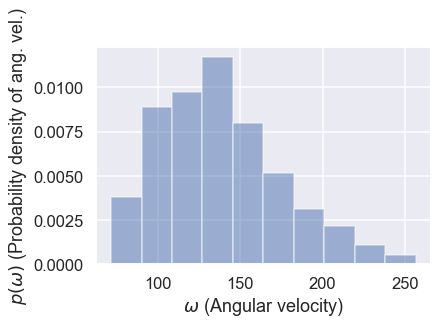

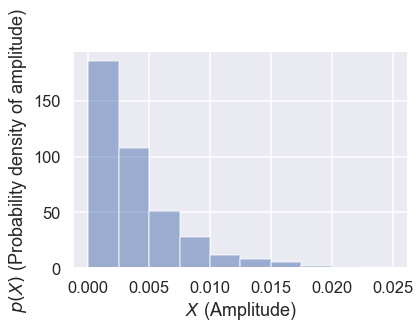

In [32]:
# Plot the angular velocity
fig, ax = plt.subplots()
ax.hist(omegas, bins=10, alpha=0.5, density=True)
ax.set_xlabel('$\omega$ (Angular velocity)')
ax.set_ylabel('$p(\omega)$ (Probability density of ang. vel.)')

# Plot the amplitude
fig, ax = plt.subplots()
ax.hist(Xs, bins=10, alpha=0.5, density=True)
ax.set_xlabel('$X$ (Amplitude)')
ax.set_ylabel('$p(X)$ (Probability density of amplitude)');

### Questions
+ What does the probability density in the figures above represent? Is the uncertainty aleatory or epistemic?
+ Rerun the code above giving different values to ``num_samples``. Can you trust the results when you pick small values? How can you pick the right value for ``num_samples``?

## The model calibration problem

The model calibration problem is the inverse of the uncertainty propagation problem.
That is why such problems are also called **inverse problems**.
It goes as follows. 
One observes a quantity that is predicted by the model and they want to go back and characterize how this observation changes the state of knowledge about the parameters of the model.

### Example: Driving a trailer on a rough road (2/3)

In this example, imagine that we put sensors on the suspension of the trailer to measure the amplitude of oscillation.
Now, the amplitude we measure is not exactly the prediction of the model.
Why is that?
First, there is observation noise.
Second, our model has a systematic error (e.g., we have completely ignored any dumping effects).
So, *the measurement is not the same as the model prediction*.
This means that we need to add one more node to the graphical representation of the model.
The new node, let's call it $X_m$ is the result of the measurement.

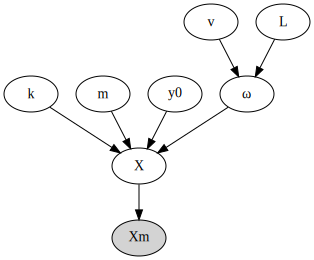

In [33]:
g = Digraph('Trailer')
g.node('k')
g.node('m')
g.node('y0', label='<y<sub>0</sub>>')
g.node('omega', label='<&omega;>')
g.node('v')
g.node('L')
g.node('X')
g.edge('v', 'omega')
g.edge('L', 'omega')
g.edge('y0', 'X')
g.edge('omega', 'X')
g.edge('k', 'X')
g.edge('m', 'X')
g.node('Xm', label='<X<sub>m</sub>>', style='filled')
g.edge('X', 'Xm')
g.render('trailer_m_g', format='png')
g

We have filled the node $X_m$ with color to indicate that it is observed.

### Solving inverse problems

We will need a couple of lectures to understand what is the right way to pose and solve the problem.
But here is the answer:
+ Quantify our **prior** state of knowledge about all the model parameters (by assigning probability densities to them).
+ Use Bayes' rule to condition the prior knowledge on the observations. This updated knowledge is our **posterior knowledge**. Unfortunately, this posterior knowledge is rarely analytically available. This is why we need the third step.
+ Create a practical procedure that characterizes our posterior state of knowledge.

The majority of the lectures of this class are about the third step.

## Hands-on activity: Catalytic Conversion of Nitrate to Nitrogen

The purpose of this hands-on activity is to:

+ Familiarize yourself more with the Python language and Jupyter notebooks.
+ Experience a real model calibration problem and appreciate its difficulties.
+ Gain some additional experince with the uncertainty propagation problem using Monte Carlo sampling.

This is Example 3.1 of [(Tsilifis, 2014)](http://arxiv.org/abs/1410.5522).

Consider the catalytic
conversion of nitrate ($\mbox{NO}_3^-$) to nitrogen ($\mbox{N}_2$) and other
by-products by electrochemical means.
The mechanism that is followed is complex and not well understood.
The experiment of [(Katsounaros, 2012)](http://www.sciencedirect.com/science/article/pii/S0013468612005208) confirmed the
production of nitrogen ($\mbox{N}_2$), ammonia
($\mbox{NH}_3$), and nitrous oxide ($\mbox{N}_2\mbox{O}$) as final products
of the reaction, as well as the intermediate production of nitrite ($\mbox{NO}_2^-$).
The data are reproduced in [Comma-separated values](https://en.wikipedia.org/wiki/Comma-separated_values) (CSV) and stored in
[data/catalysis.csv](data/catalysis.csv).
The time is measured in minutes and the conentrations are measured in $\mbox{mmol}\cdot\mbox{L}^{-1}$.
Let's load the data into this notebook using the [Pandas](http://pandas.pydata.org) Python module:

In [34]:
# If this fails, you haven't uploaded "catalysis.csv".
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/PredictiveScienceLab/uq-course/master/lectures/catalysis.csv"
s=requests.get(url).content
catalysis_data = pd.read_csv(io.StringIO(s.decode('utf-8')))
catalysis_data = pd.read_csv('catalysis.csv', index_col=0)
catalysis_data

,NO3,NO2,N2,NH3,N2O
Time,,,,,
0,500.00,0.00,0.00,0.00,0.00
30,250.95,107.32,18.51,3.33,4.98
60,123.66,132.33,74.85,7.34,20.14
90,84.47,98.81,166.19,13.14,42.10
120,30.24,38.74,249.78,19.54,55.98
150,27.94,10.42,292.32,24.07,60.65
180,13.54,6.11,309.50,27.26,62.54


Let's visualize the data using [Matplotlib](http://matplotlib.org):

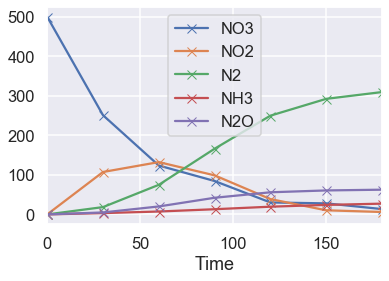

In [35]:
catalysis_data.plot(style='-x')

The theory of catalytic reactions guarantees that the total mass must be conserved.
However, this is not the case in our dataset:

In [36]:
catalysis_data.sum(axis=1)

Time
0      500.00
30     385.09
60     358.32
90     404.71
120    394.28
150    415.40
180    418.95
dtype: float64

This inconsistency suggests the existence of an intermediate unobserved reaction product X.
[(Katsounaros, 2012)](http://www.sciencedirect.com/science/article/pii/S0013468612005208) suggested that the following reaction path shown in the following figure.

![](scheme.png "Reaction Scheme")

The dynamical system associated with the reaction is:
$$
\begin{array}{cc}
\frac{d \left[\mbox{NO}_3^-\right]}{dt} &= -k_1\left[\mbox{NO}_3^-\right], \\
\frac{d\left[\mbox{NO}_2^-\right]}{dt} &= k_1\left[\mbox{NO}_3^-\right] - (k_2 + k_4 +
k_5)[\mbox{NO}_2^-], \\
\frac{d \left[\mbox{X}\right]}{dt} &= k_2 \left[\mbox{NO}_2^-\right] - k_3 [X],\\
\frac{d \left[\mbox{N}_2\right]}{dt} &= k_3 \left[\mbox{X}\right], \\
\frac{d \left[\mbox{NH}_3\right]}{dt} &= k_4 \left[\mbox{NO}_2^-\right],\\
\frac{d \left[\mbox{N}_2O\right]}{dt} &= k_5 \left[\mbox{NO}_2^-\right],
\end{array}
$$
where $[\cdot]$ denotes the concentration of a quantity, and
$k_i > 0$, $i=1,...5$ are the *kinetic rate constants*.


### Questions

+ Assume that you are a chemical engineer and that you are assigned the task of designing a reactor for the conversion of nitrate to nitrogen. Before you start designing, you collect information in an attempt to characterize your state of knowledge about the problem. How many different sources of uncertainty can you think of?

+ Which of these uncertainties would you characterize as aleatory?

+ Which of these uncertainties would you characterize as as epistemic?

### Computational Model

We will develop a generic computational model for the solution of dynamical systems and we will use it to study the catalysis problem. The code relies on the [Fourth-order Runge-Kutta method](https://en.wikipedia.org/wiki/Runge–Kutta_methods) and is a modified copy of [http://www.math-cs.gordon.edu/courses/ma342/python/diffeq.py](http://www.math-cs.gordon.edu/courses/ma342/python/diffeq.py) developed by Jonathan Senning. The code solves:

$$
\begin{array}{ccc}
\dot{\mathbf{y}} &=& f(\mathbf{y}, t),\\
\mathbf{y}(0) &=& \mathbf{y}_0.
\end{array}
$$

In [37]:
import numpy as np
def rk45( f, y0, t, args=() ):
    """Fourth-order Runge-Kutta method with error estimate.

    USAGE:
        y = rk45(f, x0, t, args=())

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        y0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.
        args  - any other parameters of the function f.

    OUTPUT:
        y     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.

    NOTES:
        This version is based on the algorithm presented in "Numerical
        Mathematics and Computing" 6th Edition, by Cheney and Kincaid,
        Brooks-Cole, 2008.
    """

    # Coefficients used to compute the independent variable argument of f

    c20  =   2.500000000000000e-01  #  1/4
    c30  =   3.750000000000000e-01  #  3/8
    c40  =   9.230769230769231e-01  #  12/13
    c50  =   1.000000000000000e+00  #  1
    c60  =   5.000000000000000e-01  #  1/2

    # Coefficients used to compute the dependent variable argument of f

    c21 =   2.500000000000000e-01  #  1/4
    c31 =   9.375000000000000e-02  #  3/32
    c32 =   2.812500000000000e-01  #  9/32
    c41 =   8.793809740555303e-01  #  1932/2197
    c42 =  -3.277196176604461e+00  # -7200/2197
    c43 =   3.320892125625853e+00  #  7296/2197
    c51 =   2.032407407407407e+00  #  439/216
    c52 =  -8.000000000000000e+00  # -8
    c53 =   7.173489278752436e+00  #  3680/513
    c54 =  -2.058966861598441e-01  # -845/4104
    c61 =  -2.962962962962963e-01  # -8/27
    c62 =   2.000000000000000e+00  #  2
    c63 =  -1.381676413255361e+00  # -3544/2565
    c64 =   4.529727095516569e-01  #  1859/4104
    c65 =  -2.750000000000000e-01  # -11/40

    # Coefficients used to compute 4th order RK estimate

    a1  =   1.157407407407407e-01  #  25/216
    a2  =   0.000000000000000e-00  #  0
    a3  =   5.489278752436647e-01  #  1408/2565
    a4  =   5.353313840155945e-01  #  2197/4104
    a5  =  -2.000000000000000e-01  # -1/5

    b1  =   1.185185185185185e-01  #  16.0/135.0
    b2  =   0.000000000000000e-00  #  0
    b3  =   5.189863547758284e-01  #  6656.0/12825.0
    b4  =   5.061314903420167e-01  #  28561.0/56430.0
    b5  =  -1.800000000000000e-01  # -9.0/50.0
    b6  =   3.636363636363636e-02  #  2.0/55.0

    n = len( t )
    y = np.array( [ y0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( y[i], t[i], *args )
        k2 = h * f( y[i] + c21 * k1, t[i] + c20 * h, *args )
        k3 = h * f( y[i] + c31 * k1 + c32 * k2, t[i] + c30 * h, *args )
        k4 = h * f( y[i] + c41 * k1 + c42 * k2 + c43 * k3, t[i] + c40 * h, *args )
        k5 = h * f( y[i] + c51 * k1 + c52 * k2 + c53 * k3 + c54 * k4, \
                        t[i] + h, *args )
        k6 = h * f( \
            y[i] + c61 * k1 + c62 * k2 + c63 * k3 + c64 * k4 + c65 * k5, \
            t[i] + c60 * h, *args )

        y[i+1] = y[i] + a1 * k1 + a3 * k3 + a4 * k4 + a5 * k5
        y5 = y[i] + b1 * k1 + b3 * k3 + b4 * k4 + b5 * k5 + b6 * k6

    return y

### Calibrating the Catalysis Model to the Experimental Data

Now that we are certain that our generic ODE solver works, let us use it to develop a solver for the catalysis model. All, we need to do is define the right hand side of the dynamics:

In [38]:
def f_catalysis(y, t, kappa):
    rhs = np.zeros((6,))
    rhs[0] = -kappa[0] * y[0]
    rhs[1] = kappa[0] * y[0] - (kappa[1] + kappa[3] + kappa[4]) * y[1]
    rhs[2] = kappa[1] * y[1] - kappa[2] * y[2]
    rhs[3] = kappa[2] * y[2]
    rhs[4] = kappa[3] * y[1]
    rhs[5] = kappa[4] * y[1]
    return rhs

Let's try to calibrate the parameters of the model to the data, manually. Because the parameters are too small, let us work with the transformed version:

$$
\xi_i = \log\left(180k_i\right).
$$

Also, let's draw the graph corresponding to this model.
We have the following variables:
+ $\xi$ corresponding to the scaled unknown parameters
+ $y$ which is the prediction of our model at all timesteps for which we have data.
+ $y_m$ which are the measured data.

The graph will look as follows:

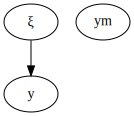

In [39]:
gc = Digraph('Catalysis')
gc.node('xi', label='<&xi;>')
gc.node('y')
gc.node('ym', label='<y<sub>m</sub>>')
gc.edge('xi', 'y')
gc

### Questions

+ In the computational cell above add the edge that connects the model output the measurement. Make sure you understand why the arrow should point the way it does. Should it go from the model output to the measurement? Or should it go from the measurement to the model output?

In [40]:
from ipywidgets import interactive
def compare_model_to_data(xi1 = 1.359, xi2 = 1.657, xi3 = 1.347, xi4 = -.162, xi5 = -1.009):
    """
    Compare the model predictions to the data.
    """
    t = np.linspace(0, 180, 100)
    kappa = np.exp([xi1, xi2, xi3, xi4, xi5]) / 180.
    y = rk45(f_catalysis, (500., 0., 0., 0., 0., 0.), t, args=(kappa,))
    fig, ax = plt.subplots(figsize=(10, 10))
    catalysis_data.plot(ax=ax, style='s')
    ax.plot(t, y[:, 0], color=sns.color_palette()[0], label='Model NO3-')
    ax.plot(t, y[:, 1], color=sns.color_palette()[1], label='Model NO2-')
    ax.plot(t, y[:, 2], color=sns.color_palette()[5], label='Model X')
    ax.plot(t, y[:, 3], color=sns.color_palette()[2], label='Model N2')
    ax.plot(t, y[:, 4], color=sns.color_palette()[3], label='Model NH3')
    ax.plot(t, y[:, 5], color=sns.color_palette()[4], label='Model N2O')
    plt.legend()
    
interactive(compare_model_to_data, xi1 = (-2, 2, 0.05), xi2 = (-2, 2, 0.05), xi3 = (-2, 2, 0.05),
                                   xi4 = (-2, 2, 0.05), xi5 = (-2, 2, 0.05) )

interactive(children=(FloatSlider(value=1.359, description='xi1', max=2.0, min=-2.0, step=0.05), FloatSlider(v…

This is the calibration problem. 

### Questions

+ Obviously, you do not want to be calibrating models by hand. Can you think of a "natural" way to calibrate a model?
+ No matter what we do, we cannot really match the data to the model exactly. List at least two reasons why this is the case.

### Uncertainty Propagation

As discussed previously, there various reasons why a model cannot be calibrated perfectly. Some of these are:

+ lack of data;
+ the existence of measurement noise;
+ the fact that the model is just not perfect.

Ignoring for the moment the possibility that the model is just bluntly wrong, we see that the lack of data or the presence of noise will induce some uncertainty in the values of the calibrated parameters. We are going to represent uncertainty on parameters by assigning a probability density on them. There are systematic ways of estimating the uncertainty induced because of the calibration process, but this will not concern us now.
For the moment, assume that somebody told us that the uncertainty in the scaled parameters $\xi_i$ of the model is as follows:


| Variable | Value            |
|---------|------------------|
| $\xi_1$ |1.35 &plusmn; 0.05 |
| $\xi_2$ |1.65 &plusmn; 0.08   |
| $\xi_3$ |1.34 &plusmn; 0.11 |
| $\xi_4$ |-0.16 &plusmn; 0.16 |
| $\xi_5$ |-3.84 &plusmn; 0.20 |

But what does this information actually mean? As we will discuss in the following lectures, this information can be used to assign a probability density on each one of these parameters, say $p(\xi_i)$, that *models* our state of knowledge about them. For example, let us assume that our state of knowledge about $\xi_1$ is given by a Gaussian probability density (don't worry about the notation - we will explain it in subsequent lectures):

$$
p(\xi_1) = \mathcal{N}(\xi_1|\mu_1=1.35, \sigma^2 = 0.05^2),
$$

which we can visualize as follows:

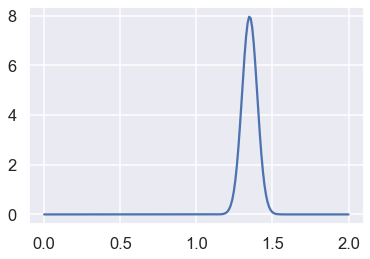

In [41]:
import scipy.stats
from scipy.stats import norm
xi1 = np.linspace(-0, 2, 200)
plt.plot(xi1, norm.pdf(xi1, loc=1.35, scale=0.05))

This means that we do not believe that the value of the parameter can be less than 1.0 or greater than 1.6. Note that, we are deliberately trying to avoid the use of the term "random". There is nothing random in our example. Probability models a state of knowledge.

How does this uncertainty propagate through the model? We will study this question with a simple numerical experiment. We are going to assign Gaussian probability densities on all the $\xi_i$'s, sample them a few times, and run our catalysis model for each one.

In [28]:
def plot_samples(mu1 = 1.359, sig1=0.055,
                mu2 = 1.657, sig2=0.086,
                mu3 = 1.347, sig3=0.118,
                mu4 = -.162, sig4=0.167,
                mu5 = -1.009, sig5=0.368,
                num_samples=1):
    """
    Take a few samples of the model to study uncertainty propagation.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    catalysis_data.plot(ax=ax, style='s')
    t = np.linspace(0, 180, 100)
    for i in range(num_samples):
        xi1 = norm.rvs(loc=mu1, scale=sig1)
        xi2 = norm.rvs(loc=mu2, scale=sig2)
        xi3 = norm.rvs(loc=mu3, scale=sig3)
        xi4 = norm.rvs(loc=mu4, scale=sig4)
        xi5 = norm.rvs(loc=mu5, scale=sig5)
        kappa = np.exp([xi1, xi2, xi3, xi4, xi5]) / 180.
        y = rk45(f_catalysis, (500., 0., 0., 0., 0., 0.), t, args=(kappa,))
        ax.plot(t, y[:, 0], linewidth=0.5, color=sns.color_palette()[0])
        ax.plot(t, y[:, 1], linewidth=0.5, color=sns.color_palette()[1])
        ax.plot(t, y[:, 2], linewidth=0.5, color=sns.color_palette()[5])
        ax.plot(t, y[:, 3], linewidth=0.5, color=sns.color_palette()[2])
        ax.plot(t, y[:, 4], linewidth=0.5, color=sns.color_palette()[3])
        ax.plot(t, y[:, 5], linewidth=0.5, color=sns.color_palette()[4])
    plt.legend()

interactive(plot_samples, mu1 = (-2, 2, 0.05), sig1=(0.02, 0.4, 0.01),
                                   mu2 = (-2, 2, 0.05), sig2=(0.02, 0.4, 0.01),
                                   mu3 = (-2, 2, 0.05), sig3=(0.02, 0.4, 0.01),
                                   mu4 = (-2, 2, 0.05), sig4=(0.02, 0.4, 0.01),
                                   mu5 = (-2, 2, 0.05), sig5=(0.02, 0.4, 0.01),
            num_samples=(1, 1100, 10))

interactive(children=(FloatSlider(value=1.359, description='mu1', max=2.0, min=-2.0, step=0.05), FloatSlider(v…

### Questions

Increase the number of samples from 1, to 10, to 100, to 1000. Each time you get a better description of uncertainty. This is a Monte Carlo simulation.

+ Ok, the more samples you get the better your predictive error bars. But can you do this with any model? When would you face difficulties with such a program? What if you want to propagate uncertainties through a very complicated model, e.g., a climate model, which may take a few hours to complete a single simulation?
+ Can you come up with any idea of accelerating the uncertainty propagation process?